In [47]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import time
import datetime
from datetime import datetime
import warnings
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

In [48]:
# Read file
df = pd.read_csv(r"D:\BCU Works\AI\assignment\earthquake.csv")
print (df.shape)
df.head(5)

(24007, 16)


,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


In [49]:
new_column_names = ["Date","Time","Latitude", "Longitude","Country","City","Area","Direction","Distance","Depth", 
                    "XM","MD","Earthquake","MW", "MS", "MB"]

df.columns = new_column_names

In [50]:
print("DESCRIBE:\n")
print(df.describe().T)

DESCRIBE:

              count       mean        std    min     25%    50%     75%  \
Latitude    24007.0  37.929474   2.205605  29.74  36.190  38.20  39.360   
Longitude   24007.0  30.773229   6.584596  18.34  26.195  28.35  33.855   
Distance    10062.0   3.175015   4.715461   0.10   1.400   2.30   3.600   
Depth       24007.0  18.491773  23.218553   0.00   5.000  10.00  22.400   
XM          24007.0   4.056038   0.574085   3.50   3.600   3.90   4.400   
MD          24007.0   1.912346   2.059780   0.00   0.000   0.00   3.800   
Earthquake  24007.0   2.196826   2.081417   0.00   0.000   3.50   4.000   
MW           5003.0   4.478973   1.048085   0.00   4.100   4.70   5.000   
MS          24007.0   0.677677   1.675708   0.00   0.000   0.00   0.000   
MB          24007.0   1.690561   2.146108   0.00   0.000   0.00   4.100   

               max  
Latitude     46.35  
Longitude    48.00  
Distance     95.40  
Depth       225.00  
XM            7.90  
MD            7.40  
Earthquake    7.

In [51]:
print("Info:\n")
print(df.info())

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24007 entries, 0 to 24006
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        24007 non-null  object 
 1   Time        24007 non-null  object 
 2   Latitude    24007 non-null  float64
 3   Longitude   24007 non-null  float64
 4   Country     24007 non-null  object 
 5   City        11754 non-null  object 
 6   Area        12977 non-null  object 
 7   Direction   10062 non-null  object 
 8   Distance    10062 non-null  float64
 9   Depth       24007 non-null  float64
 10  XM          24007 non-null  float64
 11  MD          24007 non-null  float64
 12  Earthquake  24007 non-null  float64
 13  MW          5003 non-null   float64
 14  MS          24007 non-null  float64
 15  MB          24007 non-null  float64
dtypes: float64(10), object(6)
memory usage: 2.9+ MB
None


In [52]:
a=df.loc[:,"Date"]                            
b=df.loc[:,"Time"]
print (a[0], b[0])
type(a)                                        

temp = a+"_"+b                               # this is the combined form we would like to achieve
timeformat="%Y.%m.%d_%H:%M:%S %p"

new=[datetime.strptime(x, timeformat) for x in temp]

#for i in temp:
#    i=datetime.strptime(i,timeformat)
#why not this way??

print("temp =",type(temp),"\n""new =",type(new),"\n""df.Time =",type(df.Date))
df.Time=new

df.rename(columns={'Time': 'Newtime'}, inplace=True) 
del df["Date"]                            
df["Year"]=[int(datetime.strftime(x,"%Y")) for x in df.Newtime]
del df["Newtime"] 

2003.05.20 12:17:44 AM
temp = <class 'pandas.core.series.Series'> 
new = <class 'list'> 
df.Time = <class 'pandas.core.series.Series'>


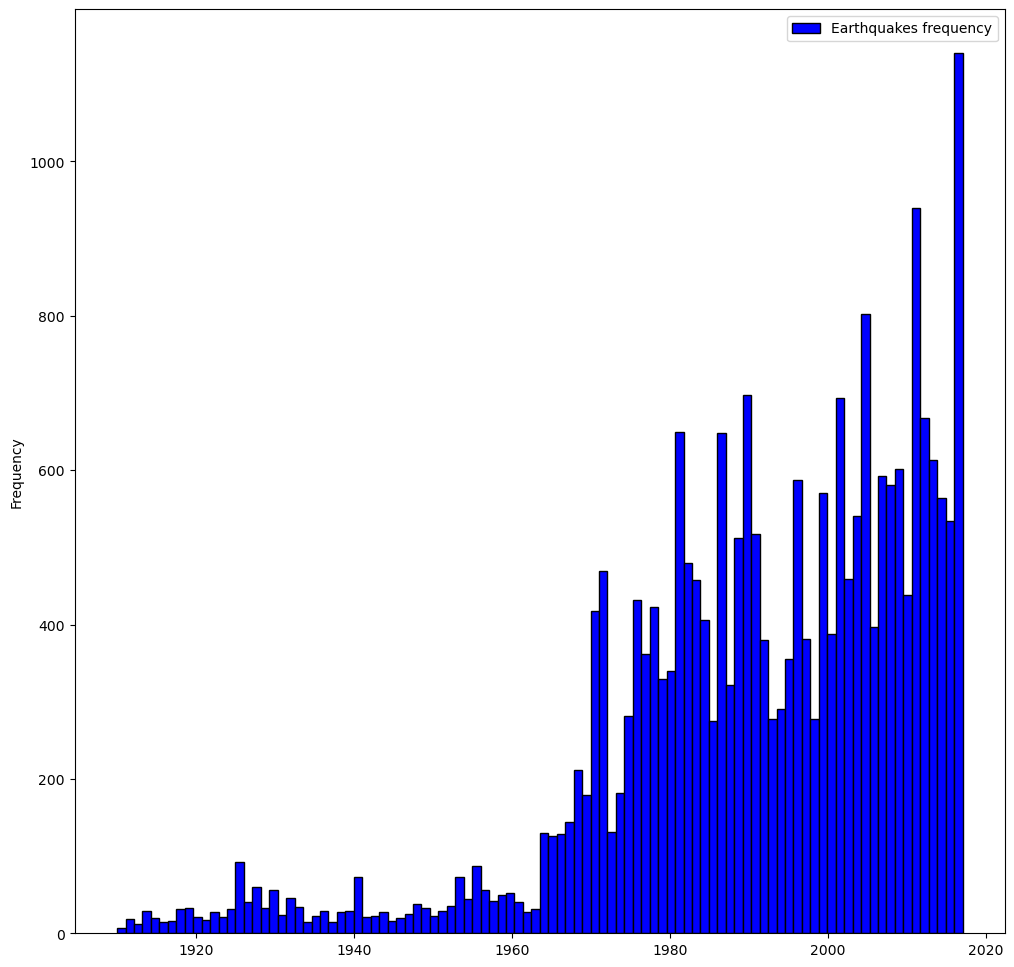

In [53]:
df.Year.plot(kind = "hist" , color = "blue" , edgecolor="black", bins = 100 , figsize = (12,12) , label = "Earthquakes frequency")
plt.legend(loc = "upper right")
plt.show()

In [54]:
# filter dataframe by year > 1970
df = df[df['Year'] > 1970]
df.head(5)

,Latitude,Longitude,Country,City,Area,Direction,Distance,Depth,XM,MD,Earthquake,MW,MS,MB,Year
0,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0,2003
1,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0,2007
2,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7,1978
3,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0,1997
4,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0,2000


In [55]:
def richter_trans(x):
    
    if x < 4.5:
        return "MILD"
    elif x < 5.5:
        return "MODERATE"
    elif x > 5.5:
        return "FATAL"
    else:
        return "NO_RISK"
df["Earthquake"] = df["Earthquake"].apply(lambda x: richter_trans(x))
print (df.shape)
df.head(5)


(20984, 15)


,Latitude,Longitude,Country,City,Area,Direction,Distance,Depth,XM,MD,Earthquake,MW,MS,MB,Year
0,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,MILD,NaN,0.0,0.0,2003
1,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,MILD,NaN,0.0,0.0,2007
2,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,MILD,NaN,0.0,3.7,1978
3,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,MILD,NaN,0.0,0.0,1997
4,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,MILD,NaN,0.0,0.0,2000


In [56]:
# check null value
print(df.isnull().any())

Latitude      False
Longitude     False
Country       False
City           True
Area           True
Direction      True
Distance       True
Depth         False
XM            False
MD            False
Earthquake    False
MW             True
MS            False
MB            False
Year          False
dtype: bool


In [57]:
# fill missing values in 'Distance' column with median value
median_distance = df['Distance'].median()
df['Distance'] = df['Distance'].fillna(median_distance)


In [58]:
# fill missing values in 'MW' column with median value
median_mw = df['MW'].median()
df['MW'] = df['MW'].fillna(median_mw)

In [59]:
file_name = 'Earthquake_data_processed.xlsx'
  
# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [60]:
warnings.filterwarnings('ignore')

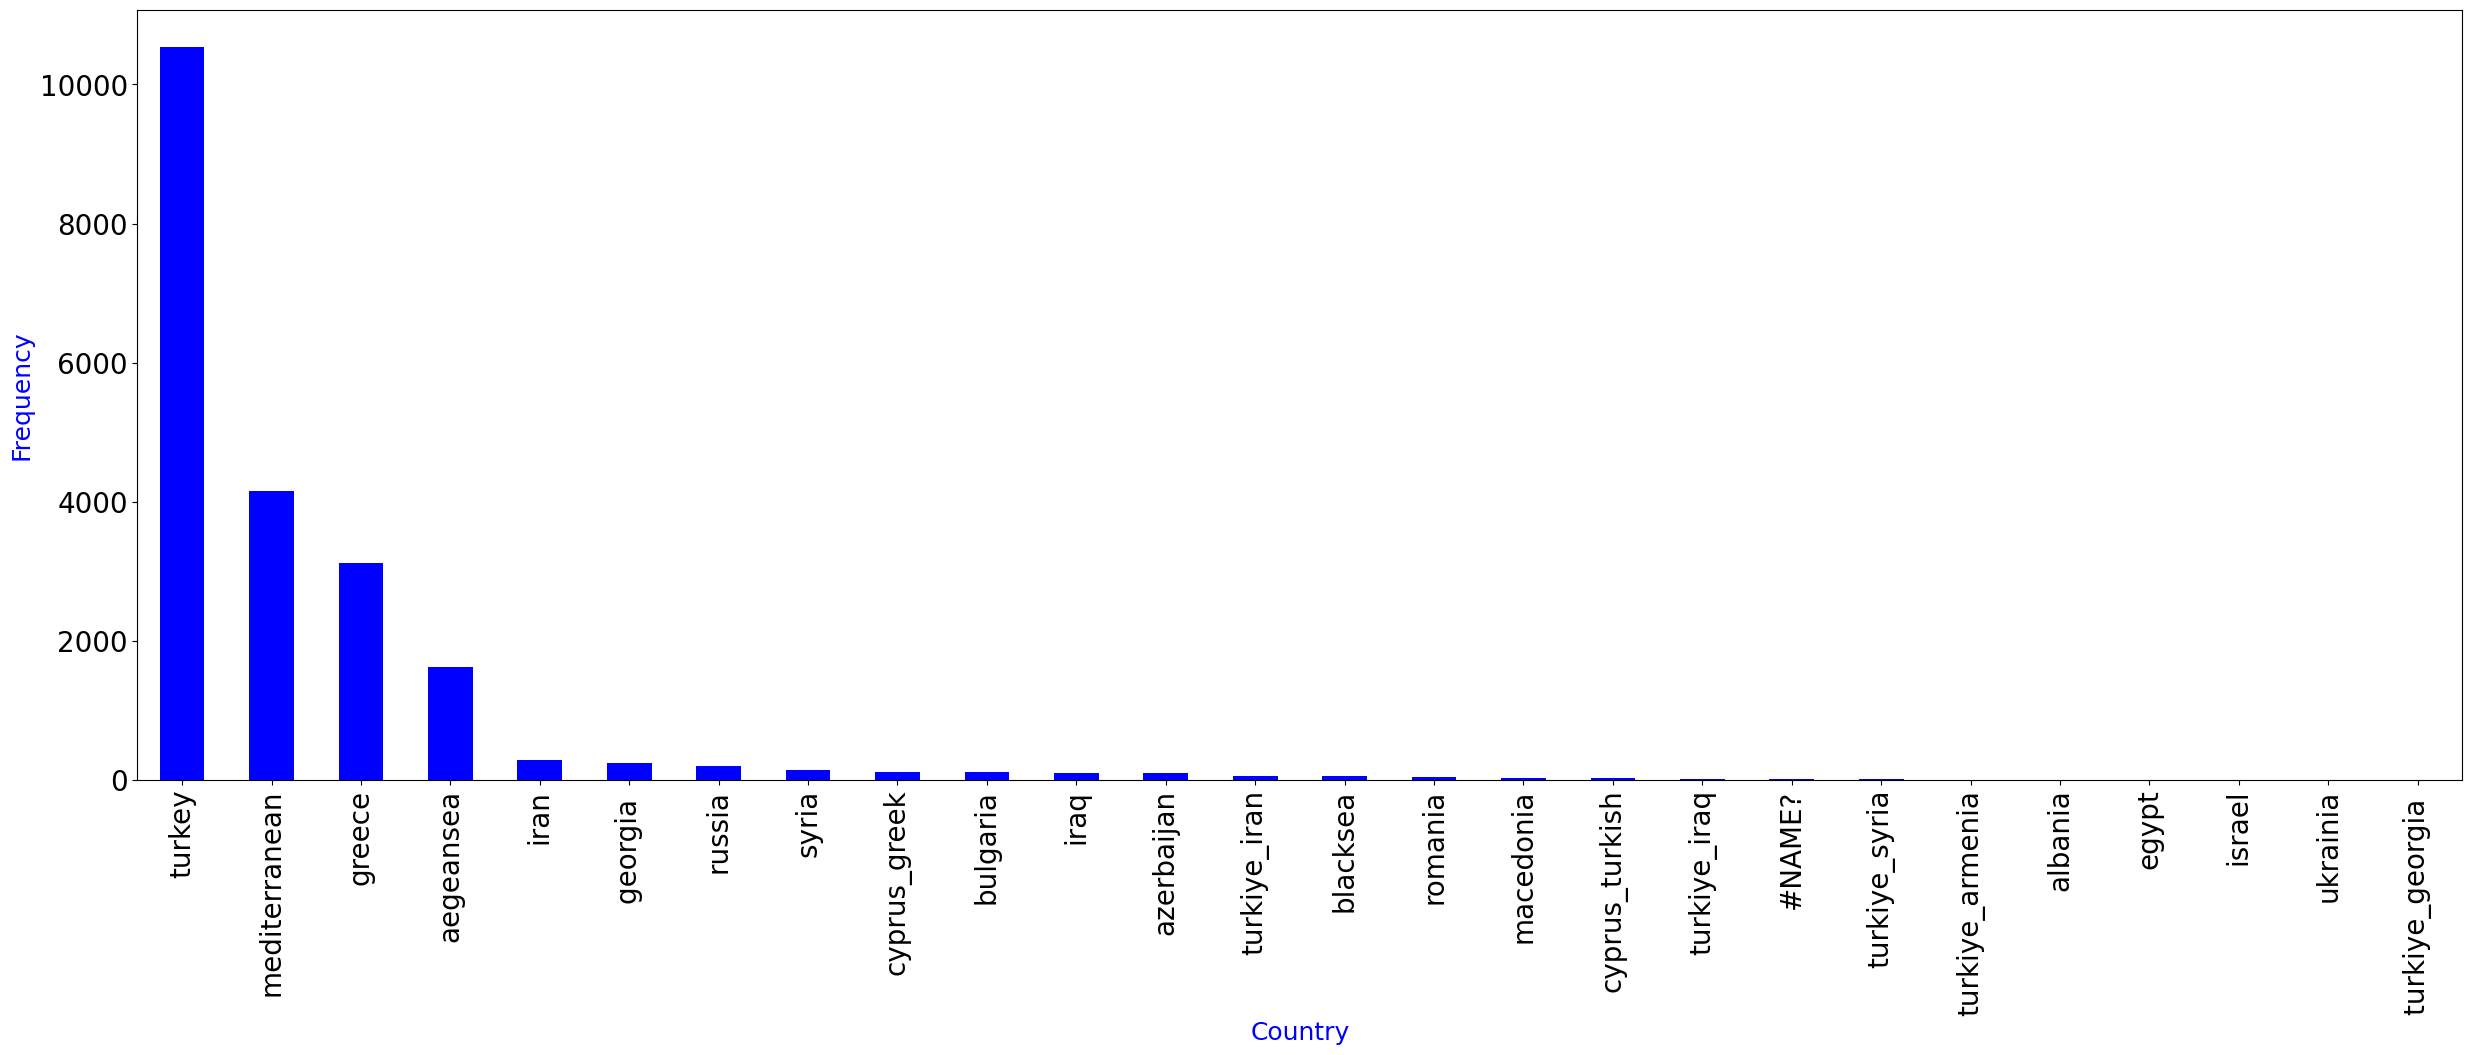

In [61]:
df.Country.value_counts().plot(kind = "bar" , color = "blue" , figsize = (30,10),fontsize = 20)
plt.xlabel("Country",fontsize=18,color="blue")
plt.ylabel("Frequency",fontsize=18,color="blue")
plt.show()

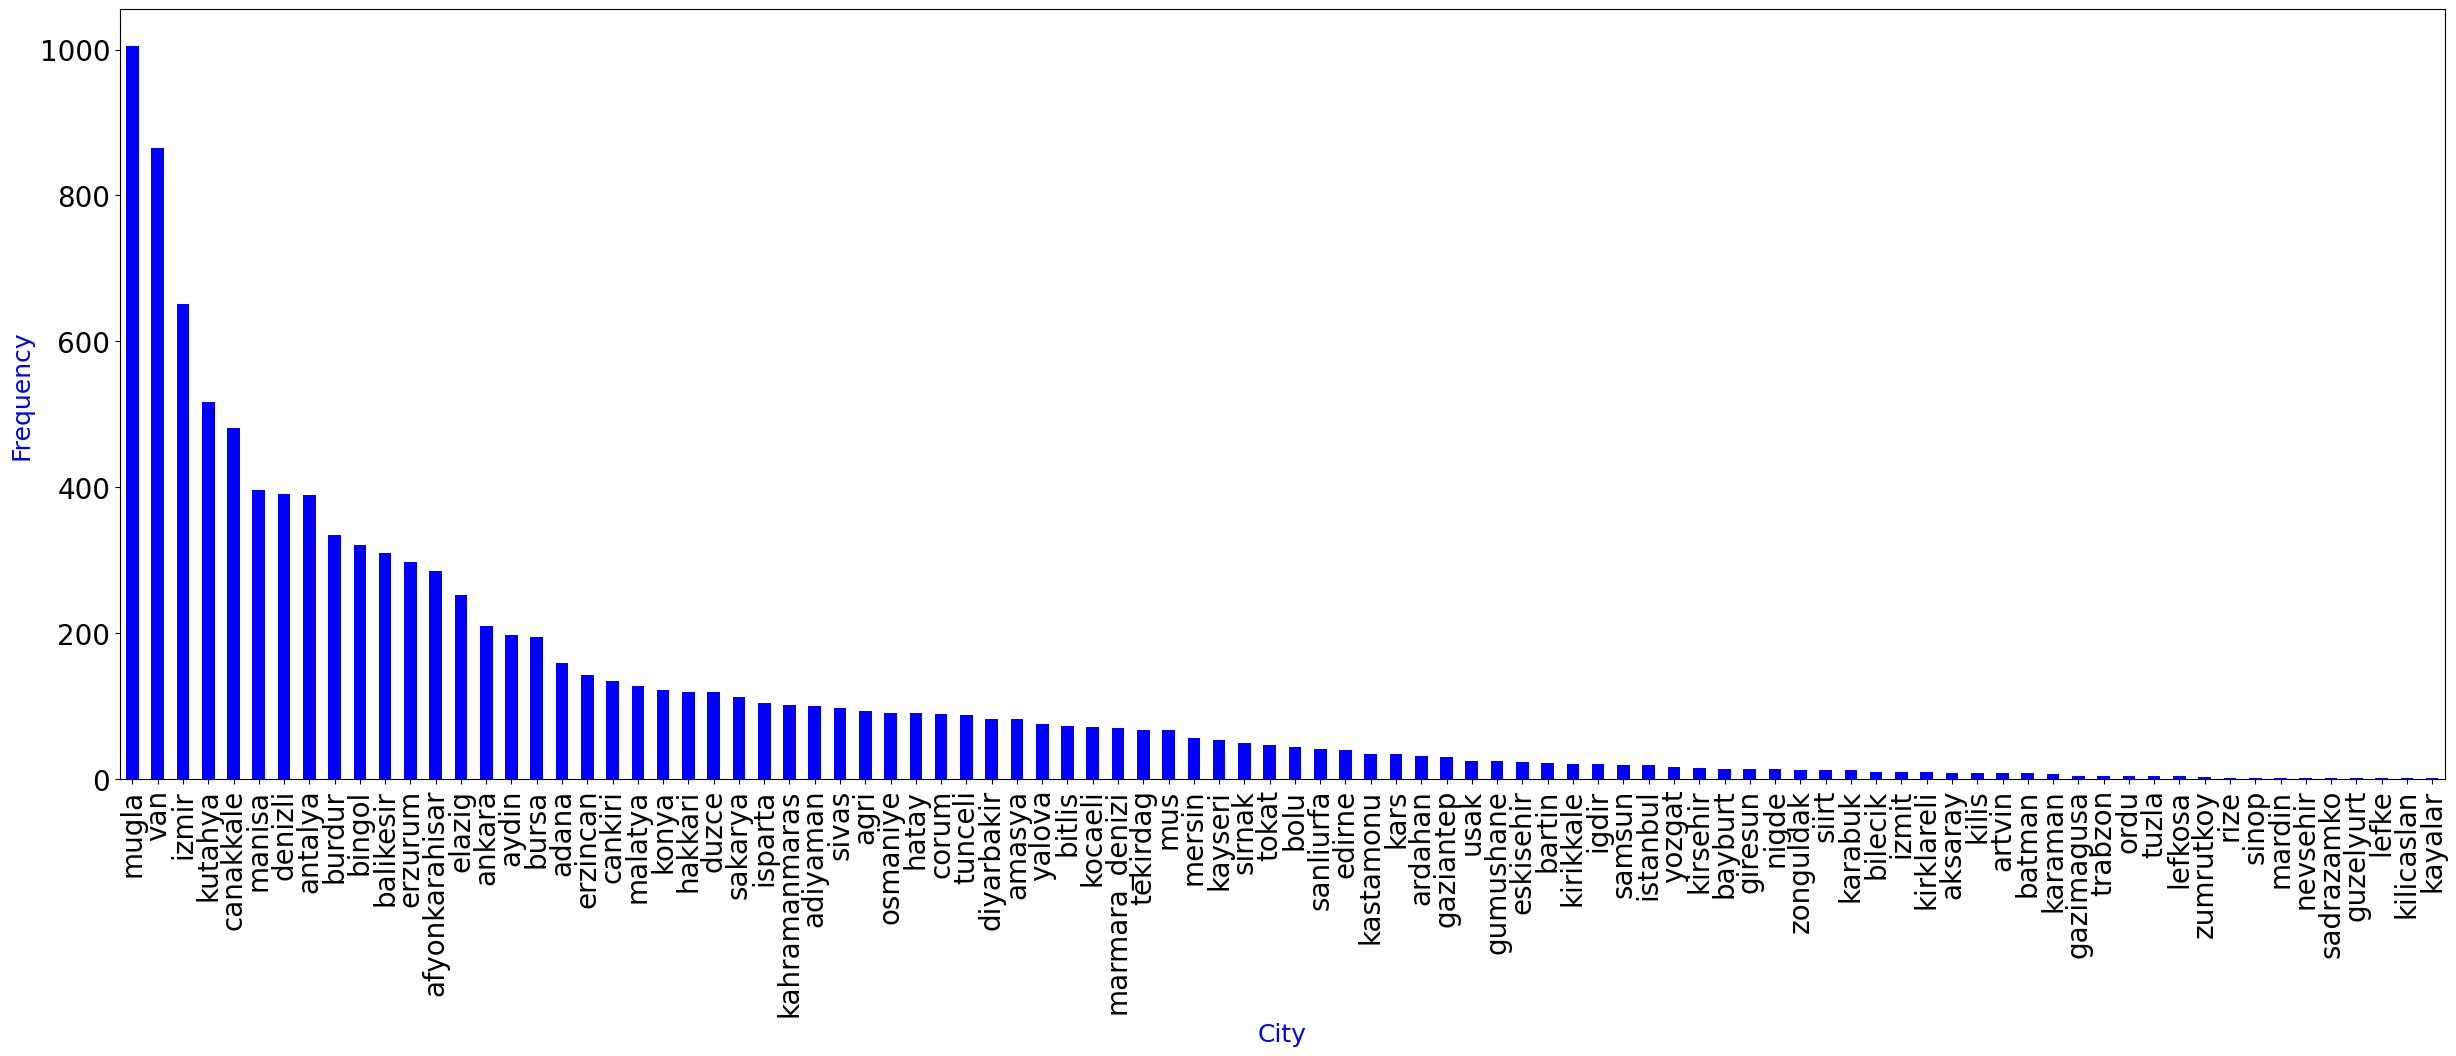

In [62]:
df.City.value_counts().plot(kind = "bar" , color = "blue" , figsize = (30,10),fontsize = 20)
plt.xlabel("City",fontsize=18,color="blue")
plt.ylabel("Frequency",fontsize=18,color="blue")
plt.show()

Text(0.5, 1.0, 'Area')

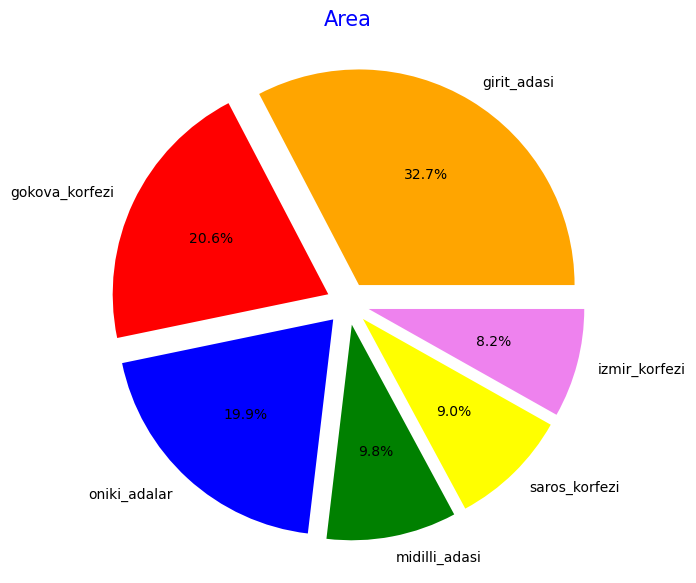

In [63]:
a=df.Area.value_counts()[0:6]
sizes=a.values
labels=a.index
explode=[0,0,0,0,0,0]
colors=["orange","red","blue","green","yellow","violet"]
plt.figure(figsize=(7,7))
plt.pie(sizes,explode=[0.1]*6,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Area',color = 'blue',fontsize = 15)

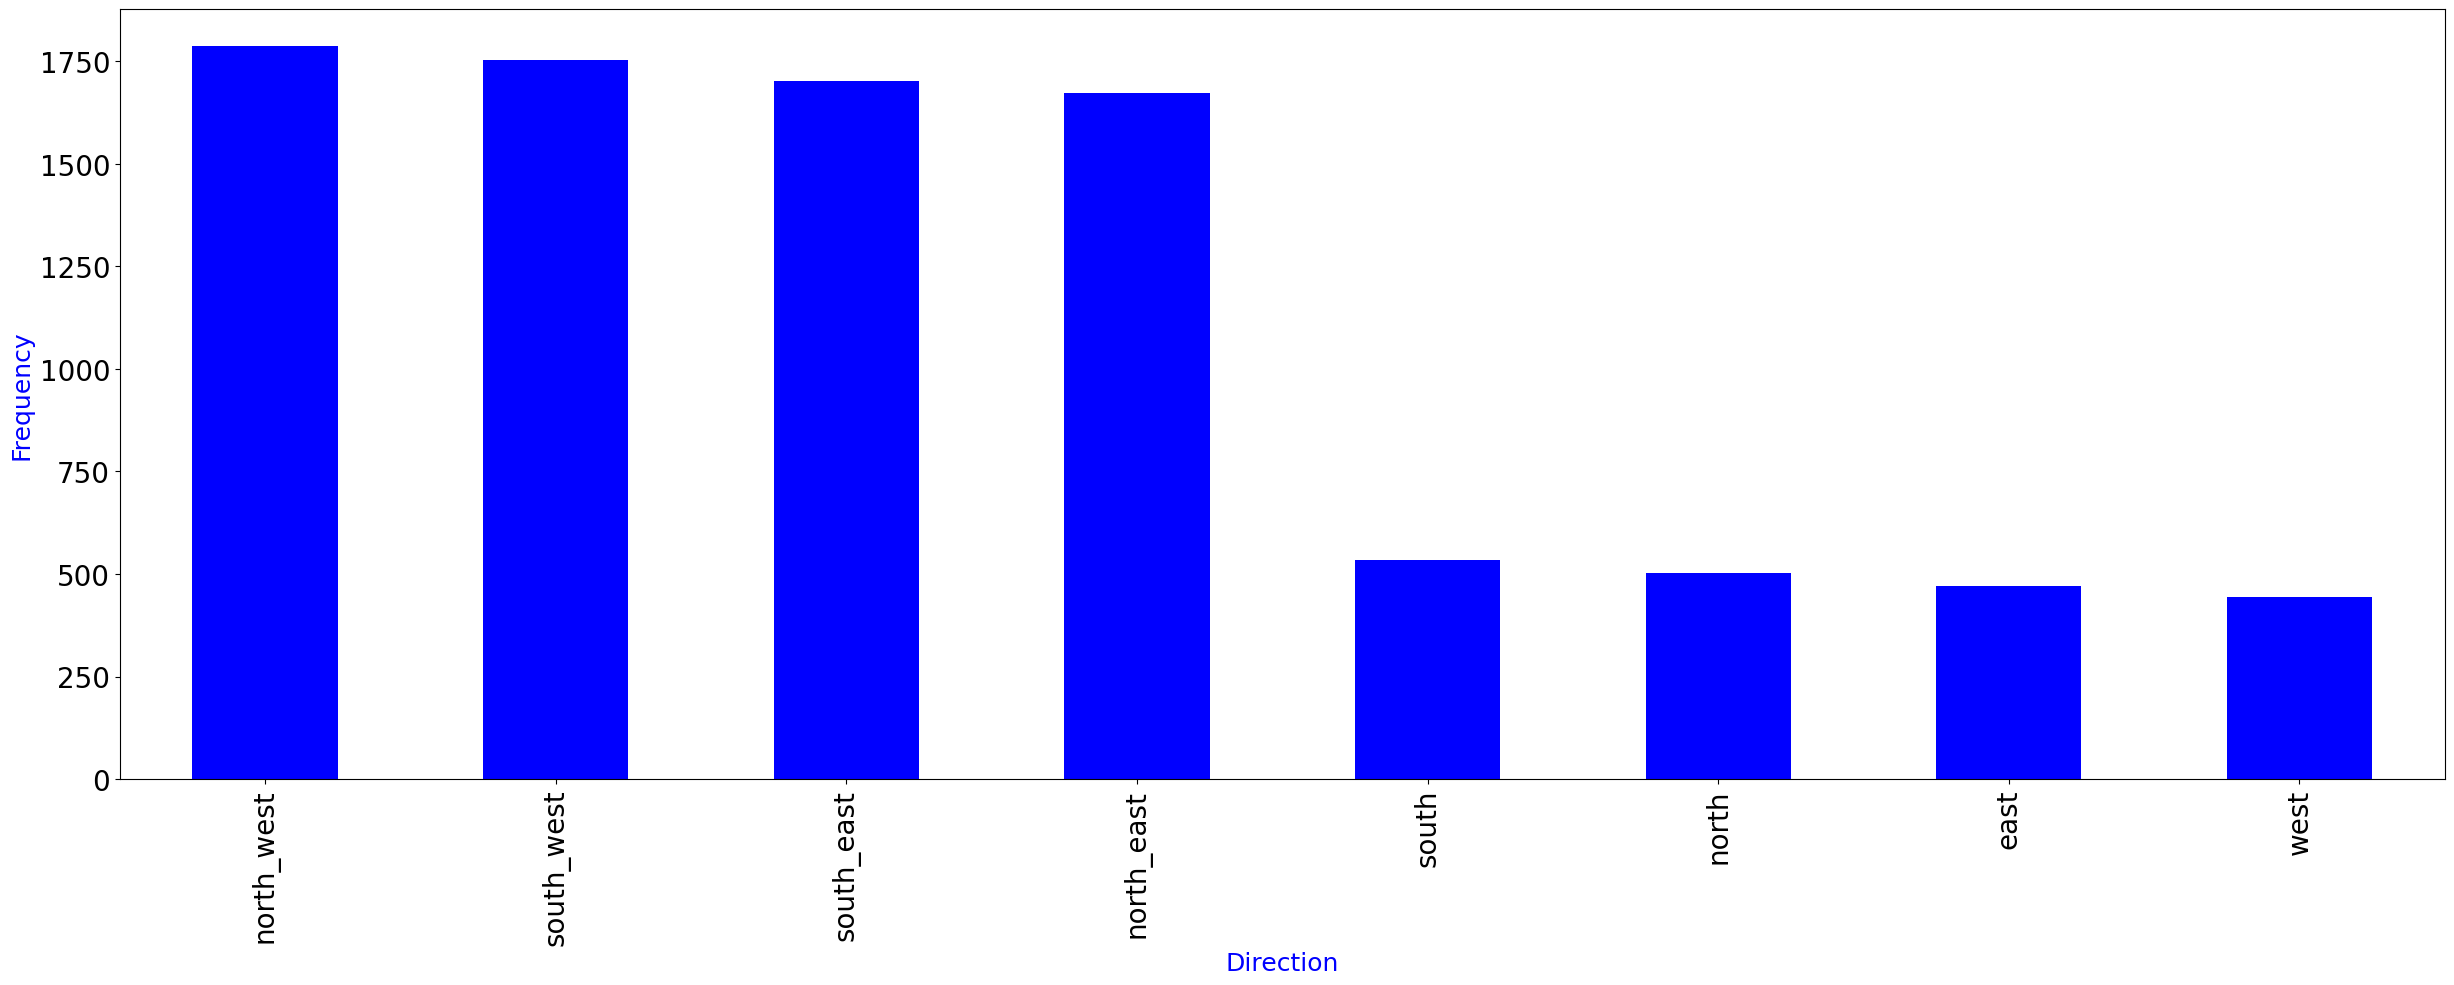

In [64]:
df.Direction.value_counts().plot(kind = "bar" , color = "blue" , figsize = (30,10),fontsize = 20)
plt.xlabel("Direction",fontsize=18,color="blue")
plt.ylabel("Frequency",fontsize=18,color="blue")
plt.show()

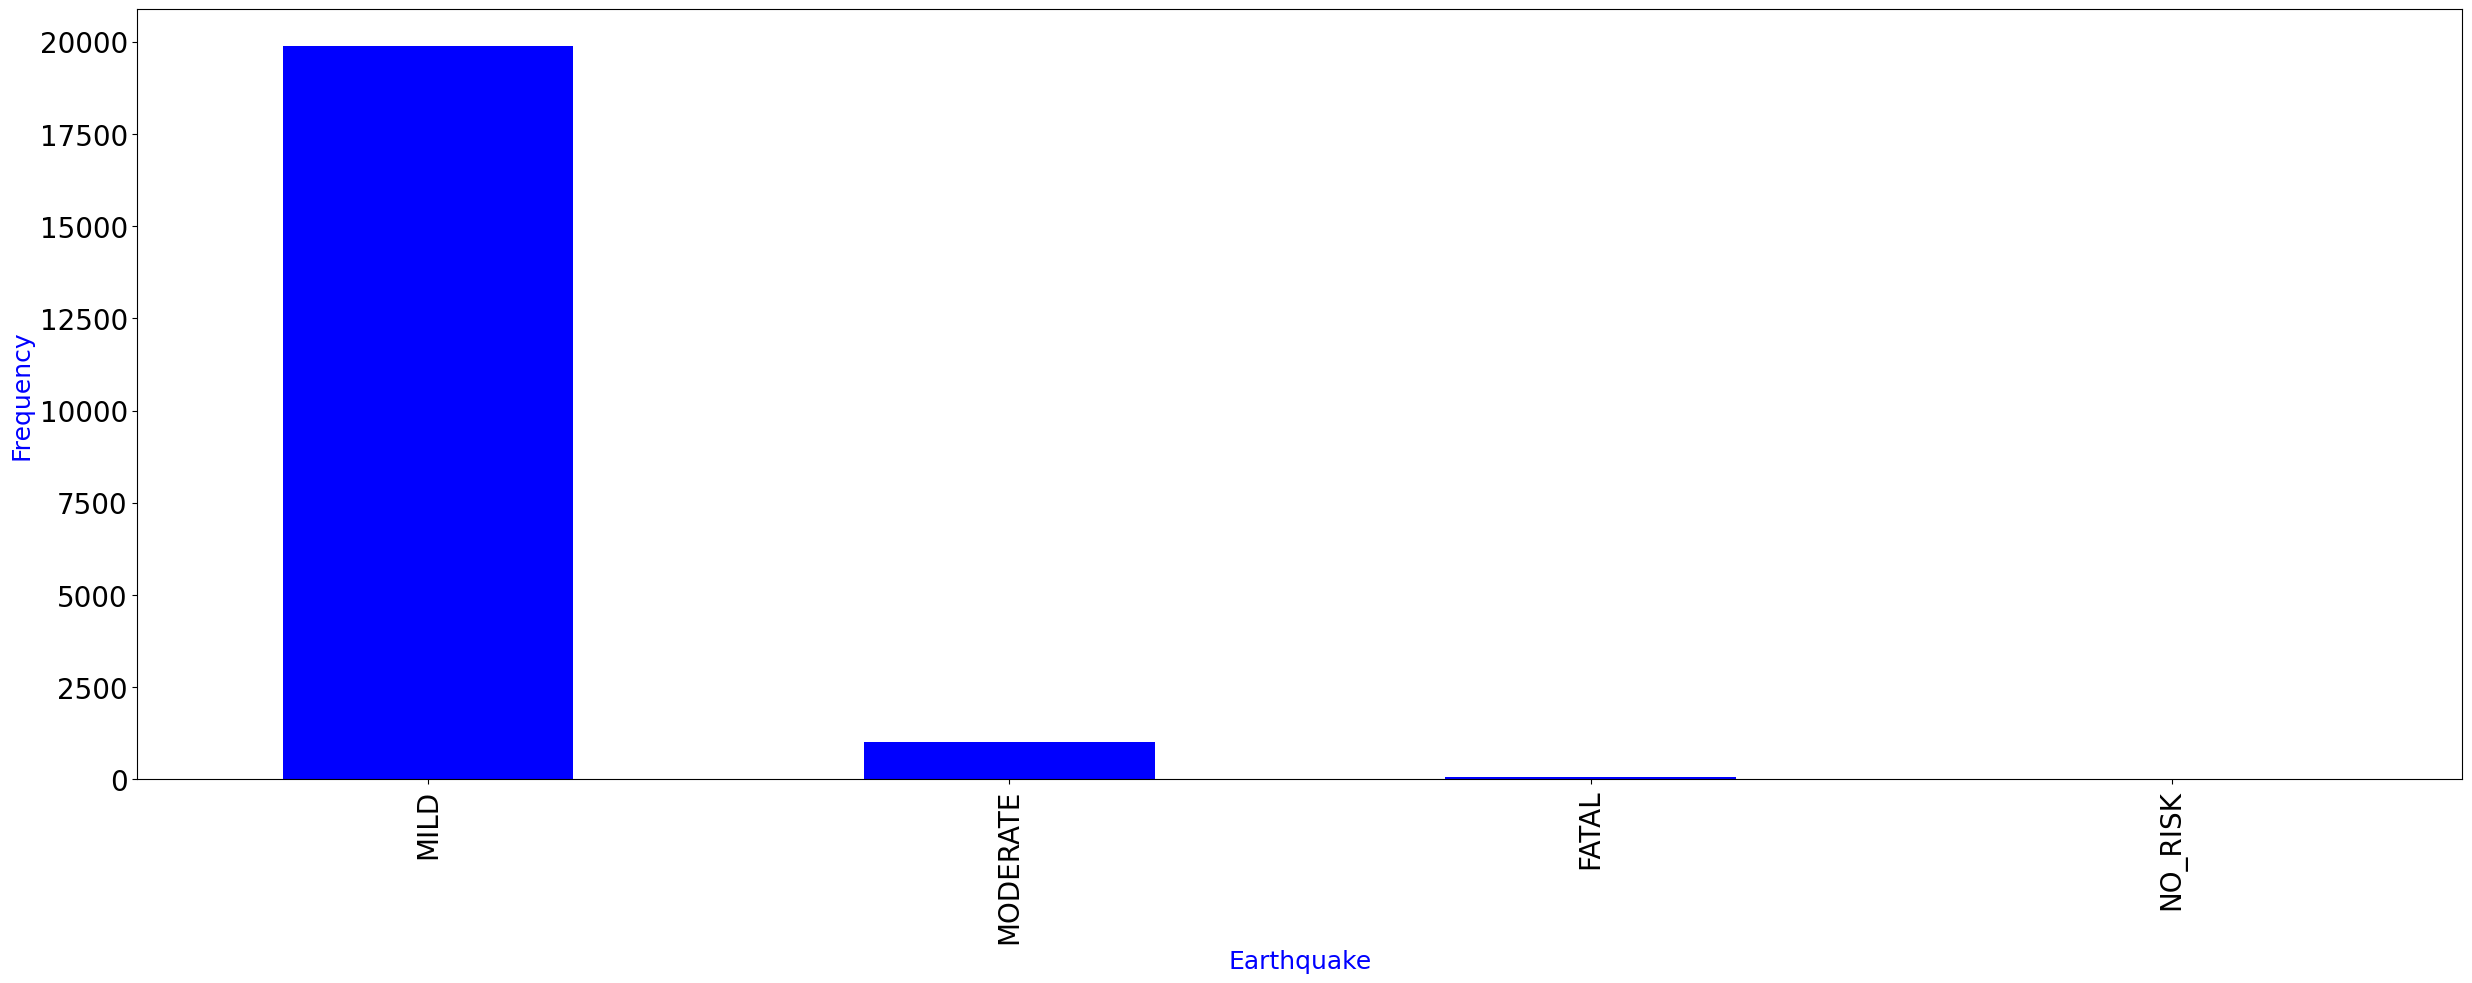

In [65]:
df.Earthquake.value_counts().plot(kind = "bar" , color = "blue" , figsize = (30,10),fontsize = 20)
plt.xlabel("Earthquake",fontsize=18,color="blue")
plt.ylabel("Frequency",fontsize=18,color="blue")
plt.show()

In [66]:

le = LabelEncoder()
df['Earthquake'] = le.fit_transform(df['Earthquake'])
df['Direction'] = le.fit_transform(df['Direction'])
df['Country'] = le.fit_transform(df['Country'])
df['City'] = le.fit_transform(df['City'])
df['Area'] = le.fit_transform(df['Area'])
print(df.head())
df.info()

   Latitude  Longitude  Country  City  Area  Direction  Distance  Depth   XM  \
0     39.04      40.38       19    16   553          7       0.1   10.0  4.1   
1     40.79      30.09       19    56   632          7       0.1    5.2  4.0   
2     38.58      27.61       19    62  2179          6       0.1    0.0  3.7   
3     39.47      36.44       19    80  2425          6       0.1   10.0  3.5   
4     40.80      30.24       19    74  3266          6       0.1    7.0  4.3   

    MD  Earthquake   MW   MS   MB  Year  
0  4.1           1  4.0  0.0  0.0  2003  
1  3.8           1  4.0  0.0  0.0  2007  
2  0.0           1  4.0  0.0  3.7  1978  
3  3.5           1  4.0  0.0  0.0  1997  
4  4.3           1  4.0  0.0  0.0  2000  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20984 entries, 0 to 24006
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Latitude    20984 non-null  float64
 1   Longitude   20984 non-null  fl

In [67]:
print(df.isnull().any())

Latitude      False
Longitude     False
Country       False
City          False
Area          False
Direction     False
Distance      False
Depth         False
XM            False
MD            False
Earthquake    False
MW            False
MS            False
MB            False
Year          False
dtype: bool


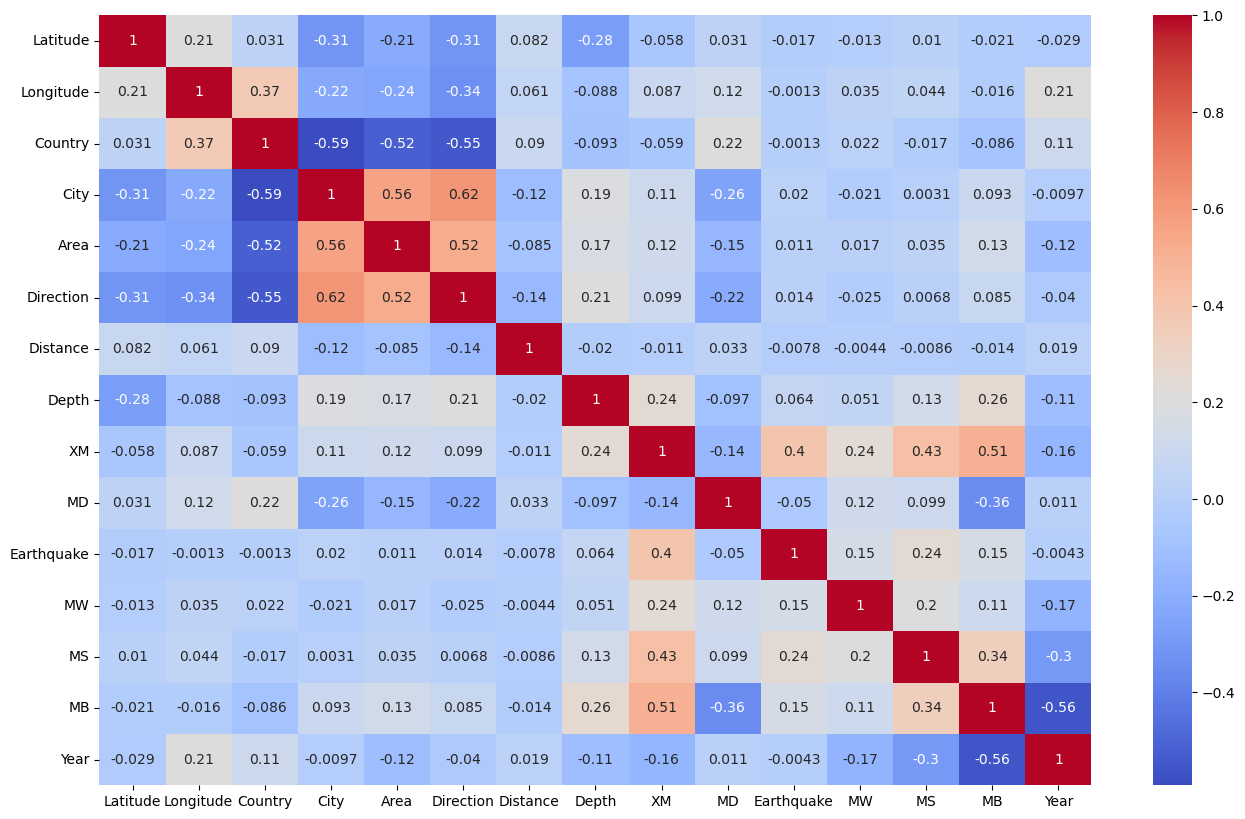

In [68]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot = True, cmap ='coolwarm')
plt.show()

<AxesSubplot:>

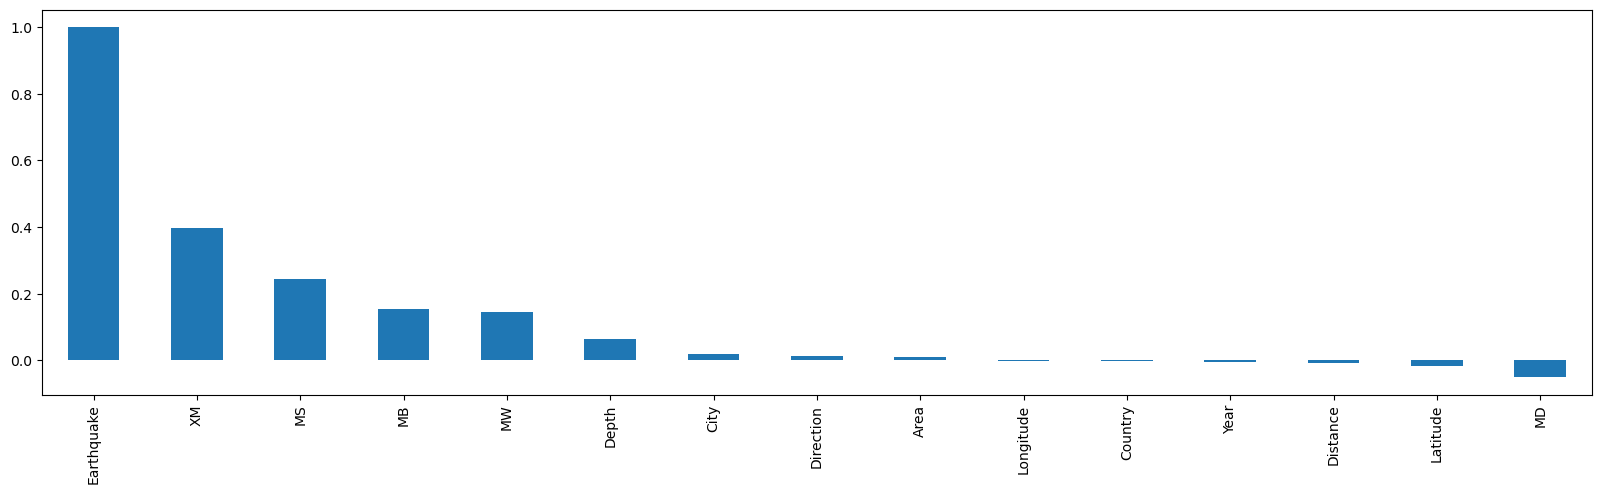

In [69]:
#Correlation between all columns and Earthquake
plt.figure(figsize=(20,5))
df.corr()['Earthquake'].sort_values(ascending = False).plot(kind='bar')

In [70]:
##Partition the data into Training and Testing data

# Select relevant columns
X = df[["Year","Latitude", "Longitude","Country","City","Area","Direction","Distance","Depth", "XM","MD", 
                    "MW", "MS", "MB"]]
y = df["Earthquake"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [71]:
 #min max convertion
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
df = pd.DataFrame(x_scaled)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.695652,0.559904,0.743088,0.76,0.173913,0.116593,0.875,0.0,0.051282,0.150,0.554054,0.555556,0.0,0.000000
1,0.782609,0.665262,0.396156,0.76,0.608696,0.133249,0.875,0.0,0.026667,0.125,0.513514,0.555556,0.0,0.000000
2,0.152174,0.532210,0.312542,0.76,0.673913,0.459414,0.750,0.0,0.000000,0.050,0.000000,0.555556,0.0,0.544118
3,0.565217,0.585792,0.610249,0.76,0.869565,0.511280,0.750,0.0,0.051282,0.000,0.472973,0.555556,0.0,0.000000
4,0.630435,0.665864,0.401214,0.76,0.804348,0.688594,0.750,0.0,0.035897,0.200,0.581081,0.555556,0.0,0.000000


In [72]:
# Train the random forest classifier
n_estimators = 100  # number of trees in the forest
rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

# Fit the regressor to the training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [73]:
# Predict on the testing set
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

cm = confusion_matrix(y_test, y_pred)
print(cm)
acc_randomforest = accuracy_score(y_test, y_pred)
print(acc_randomforest)
print(metrics.classification_report(y_test, y_pred))

[[  14    0    0    0]
 [   0 3948   33    0]
 [   0   32  169    0]
 [   1    0    0    0]]
0.9842744817726948
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.99      0.99      0.99      3981
           2       0.84      0.84      0.84       201
           3       0.00      0.00      0.00         1

    accuracy                           0.98      4197
   macro avg       0.69      0.71      0.70      4197
weighted avg       0.98      0.98      0.98      4197



In [74]:
# Initialize a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

In [75]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc_dtc = accuracy_score(y_test, y_pred)
print(acc_dtc)
print(metrics.classification_report(y_test, y_pred))

[[  13    0    0    1]
 [   1 3940   40    0]
 [   1   38  161    1]
 [   1    0    0    0]]
0.9802239695020253
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.99      0.99      0.99      3981
           2       0.80      0.80      0.80       201
           3       0.00      0.00      0.00         1

    accuracy                           0.98      4197
   macro avg       0.65      0.68      0.66      4197
weighted avg       0.98      0.98      0.98      4197



In [76]:
# KNeighbors
neigh = KNeighborsClassifier(n_neighbors=7,metric = 'minkowski', p = 2)
neigh.fit(X_train,y_train)

# Make predictions on the testing data
y_pred = neigh.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc_knn = accuracy_score(y_test, y_pred)
print(acc_knn)
print(metrics.classification_report(y_test, y_pred))


[[   0   12    2    0]
 [   0 3971   10    0]
 [   0  193    8    0]
 [   0    1    0    0]]
0.9480581367643555
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.95      1.00      0.97      3981
           2       0.40      0.04      0.07       201
           3       0.00      0.00      0.00         1

    accuracy                           0.95      4197
   macro avg       0.34      0.26      0.26      4197
weighted avg       0.92      0.95      0.93      4197



In [77]:
# Train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

In [78]:
# Make predictions on test data
y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc_mlp = accuracy_score(y_test, y_pred)
print(acc_mlp)
print(metrics.classification_report(y_test, y_pred))

[[   0   14    0    0]
 [   0 3979    2    0]
 [   0  200    1    0]
 [   0    1    0    0]]
0.9482964021920419
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.95      1.00      0.97      3981
           2       0.33      0.00      0.01       201
           3       0.00      0.00      0.00         1

    accuracy                           0.95      4197
   macro avg       0.32      0.25      0.25      4197
weighted avg       0.92      0.95      0.92      4197



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 500, 1000], 
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: {:.4f}".format(grid_search.best_score_))

tuned_rf = grid_search.best_score_

In [1826]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for the decision tree
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: {:.4f}".format(grid_search.best_score_))

tuned_clf = grid_search.best_score_

Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Accuracy Score: 0.980


In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the hyperparameters to tune
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Create the KNeighborsClassifier object
neigh = KNeighborsClassifier()

# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(neigh, param_grid, cv=5)
grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid.best_params_)
print("Best Accuracy Score: {:.4f}".format(grid_search.best_score_))

tuned_knn = grid_search.best_score_

In [1828]:
# Define the hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(10,), (10, 10), (20,)],
    'alpha': [0.0001, 0.001, 0.01]
}

# Create a GridSearchCV object with the MLPClassifier and the hyperparameter grid
grid_search = GridSearchCV(
    estimator=MLPClassifier(max_iter=1000, random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

# Train the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Accuracy score: {grid_search.best_score_:.4f}")

tuned_mlp = grid_search.best_score_

Best hyperparameters: {'alpha': 0.0001, 'hidden_layer_sizes': (20,)}
Accuracy score: 0.946


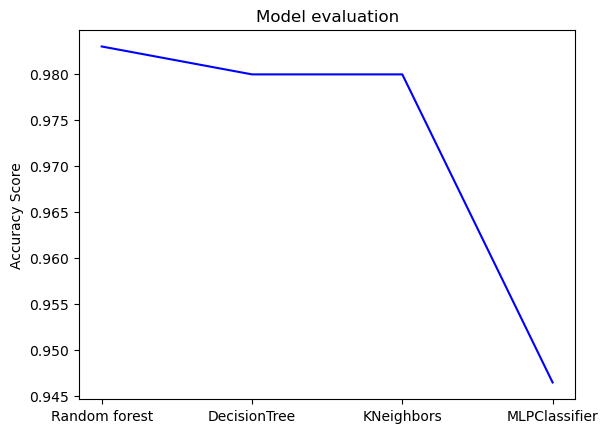

In [1829]:
import matplotlib.pyplot as plt
# Define the x and y values
x = ["Random forest", "DecisionTree", "KNeighbors", "MLPClassifier"]
y = [tuned_rf,tuned_clf, tuned_knn, tuned_mlp]
# Create a line graph
plt.plot(x, y,color='blue')
# Set the title and axis labels
plt.title('Model evaluation')
#plt.xlabel('Model name')
plt.ylabel('Accuracy Score')
# Display the line graph
plt.show()

In [ ]:
model_scores = {
    'Random forest': tuned_rf*100,
    'DecisionTree': tuned_clf*100,
    'KNeighborsClassifier': tuned_knn*100,
    'MLPClassifier': tuned_mlp*100
}

# Print the scores for each model
for model, score in model_scores.items():
    print("{}: Best Score = {:.2f}%".format(model, score))

# Find the model with the highest score
best_model = max(model_scores, key=model_scores.get)
best_score = model_scores[best_model]
print("Best Model: {}".format(best_model))
print("Best Score: {:.2f}%".format(best_score))